2014-02-16 00:00:00 missing data


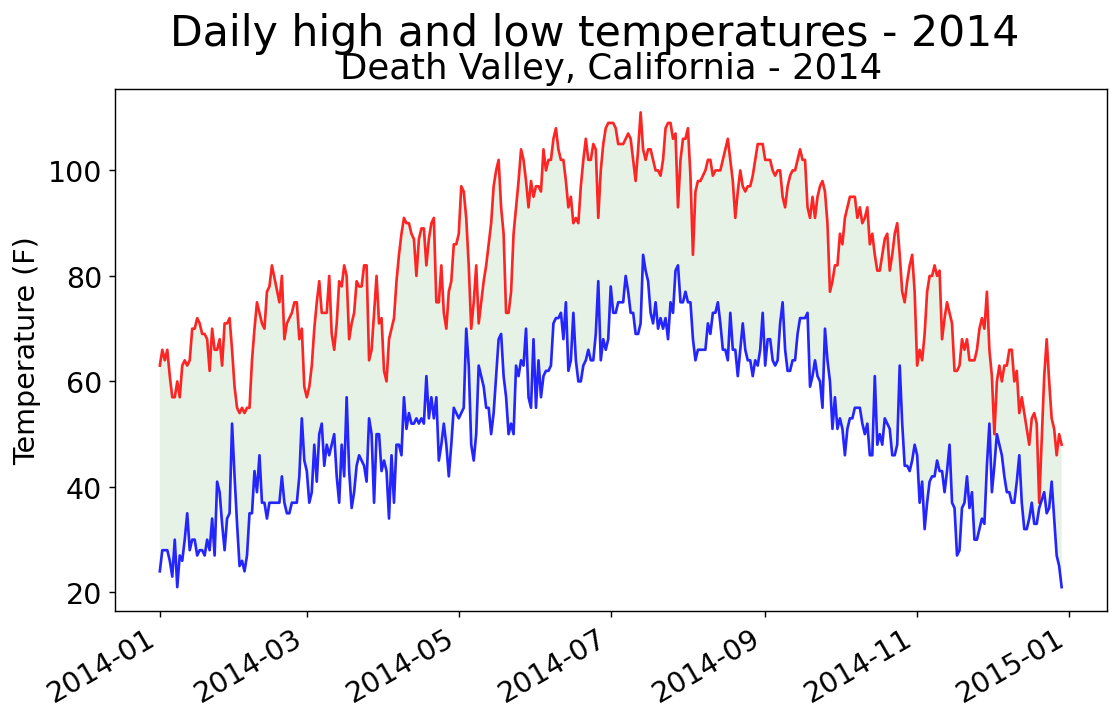

In [13]:
import matplotlib.pyplot as plt
from datetime import datetime
import csv

filename = '/Users/momo/Desktop/Python/data_visiable/2.Download_Data/datas/death_valley_2014.csv'

# 从文件中提取，最高温
with open(filename) as f:
    # csv 文件打开方式
    reader = csv.reader(f)
    # 调用函数一次，就返回一行，所以我们看到的是开头
    header_row = next(reader)  # 把标题行单独赋出来
    dates, highs, lows = [], [], []
    # 标题行已经分配走了，遍历的就是后面的数据了
    for row in reader:
        try:
            time = datetime.strptime(row[0], "%Y-%m-%d")
            high = int(row[1])      # 转换成 int 以便于 matplotlib 读取
            low = int(row[3])
        except ValueError:
            print(time, 'missing data') # 具体告知那天的数据丢失了
        else:
            # 把对应的日期输入到列表中
            dates.append(time)
            # 最高最低温输入到表里
            highs.append(high)
            lows.append(low)

# 背景
fig = plt.figure(dpi=128, figsize=(10, 6))

# 细节布置
plt.suptitle("Daily high and low temperatures - 2014", fontsize=24)    # 主标题
plt.title("Death Valley, California - 2014", fontsize=20)         # 二级标题
plt.xlabel("", fontsize=16)
# 绘制倾斜的x轴，防止重叠
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)

# 填充
plt.fill_between(dates, highs, lows, facecolor='green', alpha=0.1)

# 绘图【线条透明些】
plt.plot(dates, highs, c='red', alpha=0.85)
plt.plot(dates, lows, c='blue', alpha=0.85)

plt.show()
